## Loading the Dataset

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [145]:
period_df = pd.read_csv("Datasets/Period_Log.csv")
user_df = pd.read_csv("Datasets/User_Profile.csv")

In [146]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,NaN,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,33.0,Follicular,Light,2,No,8,...,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,33.0,Follicular,Heavy,8,No,5,...,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,34.0,Luteal,Light,3,No,8,...,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,31.0,Luteal,Moderate,3,No,9,...,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


In [147]:
user_df.head()

,user_id,state,age,bmi,diet_quality,exercise_frequency,sleep_hours,caffeine_intake,water_intake_liters,alcohol_consumption,smoking_status,birth_control_use,pcos_diagnosed,stress_score_baseline
0,U00001,Rhode Island,34,26.0,Good,5–6 days/week,5.4,1.5,2.0,Occasionally,No,1,1,4.1
1,U00002,New Hampshire,32,26.6,Good,5–6 days/week,5.5,2.9,2.3,Weekly,No,0,0,5.7
2,U00003,Iowa,18,16.0,Poor,1–2 days/week,6.7,0.5,2.1,Never,No,1,0,3.1
3,U00004,Texas,30,24.7,Excellent,NaN,7.3,0.4,1.8,Occasionally,No,1,0,6.6
4,U00005,Delaware,32,29.2,Good,1–2 days/week,7.1,2.2,2.2,Occasionally,No,0,1,3.1


## Data Cleaning 

In [148]:
period_df.shape

(17976, 21)

#### Exploring period_df

In [149]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       15976 non-null  float64
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

#### Exploring user_df

In [150]:
user_df.shape

(2000, 14)

In [151]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2000 non-null   object 
 1   state                  2000 non-null   object 
 2   age                    2000 non-null   int64  
 3   bmi                    2000 non-null   float64
 4   diet_quality           2000 non-null   object 
 5   exercise_frequency     1615 non-null   object 
 6   sleep_hours            2000 non-null   float64
 7   caffeine_intake        2000 non-null   float64
 8   water_intake_liters    2000 non-null   float64
 9   alcohol_consumption    2000 non-null   object 
 10  smoking_status         2000 non-null   object 
 11  birth_control_use      2000 non-null   int64  
 12  pcos_diagnosed         2000 non-null   int64  
 13  stress_score_baseline  2000 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 218.9+ 

### Checking the missing values

In [152]:
period_df.isnull().sum()

user_id                      0
cycle_number                 0
start_date                   0
cycle_length_days            0
prev_cycle_length         2000
cycle_phase                  0
flow_level                   0
pain_level                   0
pms_symptoms                 0
mood_score                   0
stress_score_cycle           0
sleep_hours_cycle            0
energy_level                 0
concentration_score          0
work_hours_lost              0
estrogen_pgml                0
progesterone_ngml            0
ovulation_result             0
overall_health_score         0
log_consistency_score        0
prepared_before_period       0
dtype: int64

In [153]:
user_df.isnull().sum()

user_id                    0
state                      0
age                        0
bmi                        0
diet_quality               0
exercise_frequency       385
sleep_hours                0
caffeine_intake            0
water_intake_liters        0
alcohol_consumption        0
smoking_status             0
birth_control_use          0
pcos_diagnosed             0
stress_score_baseline      0
dtype: int64

### Handling the missing values

In [154]:
period_df = period_df.drop("prev_cycle_length", axis=1)

In [155]:
period_df.isnull().sum()

user_id                   0
cycle_number              0
start_date                0
cycle_length_days         0
cycle_phase               0
flow_level                0
pain_level                0
pms_symptoms              0
mood_score                0
stress_score_cycle        0
sleep_hours_cycle         0
energy_level              0
concentration_score       0
work_hours_lost           0
estrogen_pgml             0
progesterone_ngml         0
ovulation_result          0
overall_health_score      0
log_consistency_score     0
prepared_before_period    0
dtype: int64

In [156]:
period_df.shape

(17976, 20)

In [157]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'cycle_phase', 'flow_level', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'ovulation_result', 'overall_health_score',
       'log_consistency_score', 'prepared_before_period'],
      dtype='object')

In [158]:
user_df["exercise_frequency"].unique()

array(['5–6 days/week', '1–2 days/week', nan, '3–4 days/week'],
      dtype=object)

In [159]:

user_df['exercise_frequency'].value_counts(dropna=False)

exercise_frequency
3–4 days/week    734
1–2 days/week    605
NaN              385
5–6 days/week    276
Name: count, dtype: int64

### Impute missing values as 0

In [160]:
mapping = {
    '1–2 days/week': 1.5,
    '3–4 days/week': 3.5,
    '5–6 days/week': 5.5
}

user_df['exercise_frequency'] = user_df['exercise_frequency'].map(mapping)


In [161]:
user_df['exercise_frequency'].unique()

array([5.5, 1.5, nan, 3.5])

In [162]:
user_df['exercise_frequency'] = user_df['exercise_frequency'].fillna(0)


In [163]:
user_df['exercise_frequency'].unique()

array([5.5, 1.5, 0. , 3.5])

In [164]:
user_df['exercise_frequency'].value_counts()

exercise_frequency
3.5    734
1.5    605
0.0    385
5.5    276
Name: count, dtype: int64

In [165]:
period_df.isnull().sum()

user_id                   0
cycle_number              0
start_date                0
cycle_length_days         0
cycle_phase               0
flow_level                0
pain_level                0
pms_symptoms              0
mood_score                0
stress_score_cycle        0
sleep_hours_cycle         0
energy_level              0
concentration_score       0
work_hours_lost           0
estrogen_pgml             0
progesterone_ngml         0
ovulation_result          0
overall_health_score      0
log_consistency_score     0
prepared_before_period    0
dtype: int64

In [166]:
user_df.isnull().sum()

user_id                  0
state                    0
age                      0
bmi                      0
diet_quality             0
exercise_frequency       0
sleep_hours              0
caffeine_intake          0
water_intake_liters      0
alcohol_consumption      0
smoking_status           0
birth_control_use        0
pcos_diagnosed           0
stress_score_baseline    0
dtype: int64

In [167]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,Luteal,Heavy,9,Yes,6,5.4,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,Follicular,Light,2,No,8,3.7,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,Follicular,Heavy,8,No,5,5.7,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,Luteal,Light,3,No,8,5.2,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,Luteal,Moderate,3,No,9,3.7,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


#### Calculating next period date and days to next period as it is our target

In [168]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,Luteal,Heavy,9,Yes,6,5.4,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,Follicular,Light,2,No,8,3.7,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,Follicular,Heavy,8,No,5,5.7,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,Luteal,Light,3,No,8,5.2,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,Luteal,Moderate,3,No,9,3.7,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


In [169]:
period_df['start_date'] = pd.to_datetime(period_df['start_date'])

In [170]:
period_df['start_date'].dtype

dtype('<M8[ns]')

In [171]:
period_df['next_period_date'] = period_df['start_date'] + pd.to_timedelta(period_df['cycle_length_days'], unit='D')
period_df['next_period_date']

0       2024-03-17
1       2024-04-19
2       2024-05-23
3       2024-06-23
4       2024-07-24
           ...    
17971   2024-08-01
17972   2024-08-28
17973   2024-09-27
17974   2024-10-26
17975   2024-11-22
Name: next_period_date, Length: 17976, dtype: datetime64[ns]

In [172]:
period_df['days_to_next_period'] = (period_df['next_period_date'] - period_df['start_date']).dt.days

In [173]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,next_period_date,days_to_next_period
0,U00001,1,2024-02-13,33,Luteal,Heavy,9,Yes,6,5.4,...,7,5.1,84.7,4.14,Positive,6.5,0.949,0,2024-03-17,33
1,U00001,2,2024-03-17,33,Follicular,Light,2,No,8,3.7,...,8,2.6,126.1,2.79,Negative,9.4,0.949,1,2024-04-19,33
2,U00001,3,2024-04-19,34,Follicular,Heavy,8,No,5,5.7,...,5,6.8,131.1,1.70,Negative,6.7,0.949,1,2024-05-23,34
3,U00001,4,2024-05-23,31,Luteal,Light,3,No,8,5.2,...,8,2.5,82.0,8.50,Negative,9.0,0.949,0,2024-06-23,31
4,U00001,5,2024-06-23,31,Luteal,Moderate,3,No,9,3.7,...,8,2.4,55.5,6.30,Negative,9.3,0.949,1,2024-07-24,31


In [174]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   cycle_phase             17976 non-null  object        
 5   flow_level              17976 non-null  object        
 6   pain_level              17976 non-null  int64         
 7   pms_symptoms            17976 non-null  object        
 8   mood_score              17976 non-null  int64         
 9   stress_score_cycle      17976 non-null  float64       
 10  sleep_hours_cycle       17976 non-null  float64       
 11  energy_level            17976 non-null  int64         
 12  concentration_score     17976 non-null  int64 

### Data Exploration

#### Categorical Feature Analysis

In [185]:
categorical_cols = period_df.select_dtypes(include = 'object')
print(categorical_cols.columns)

Index(['user_id', 'cycle_phase', 'flow_level', 'pms_symptoms',
       'ovulation_result'],
      dtype='object')


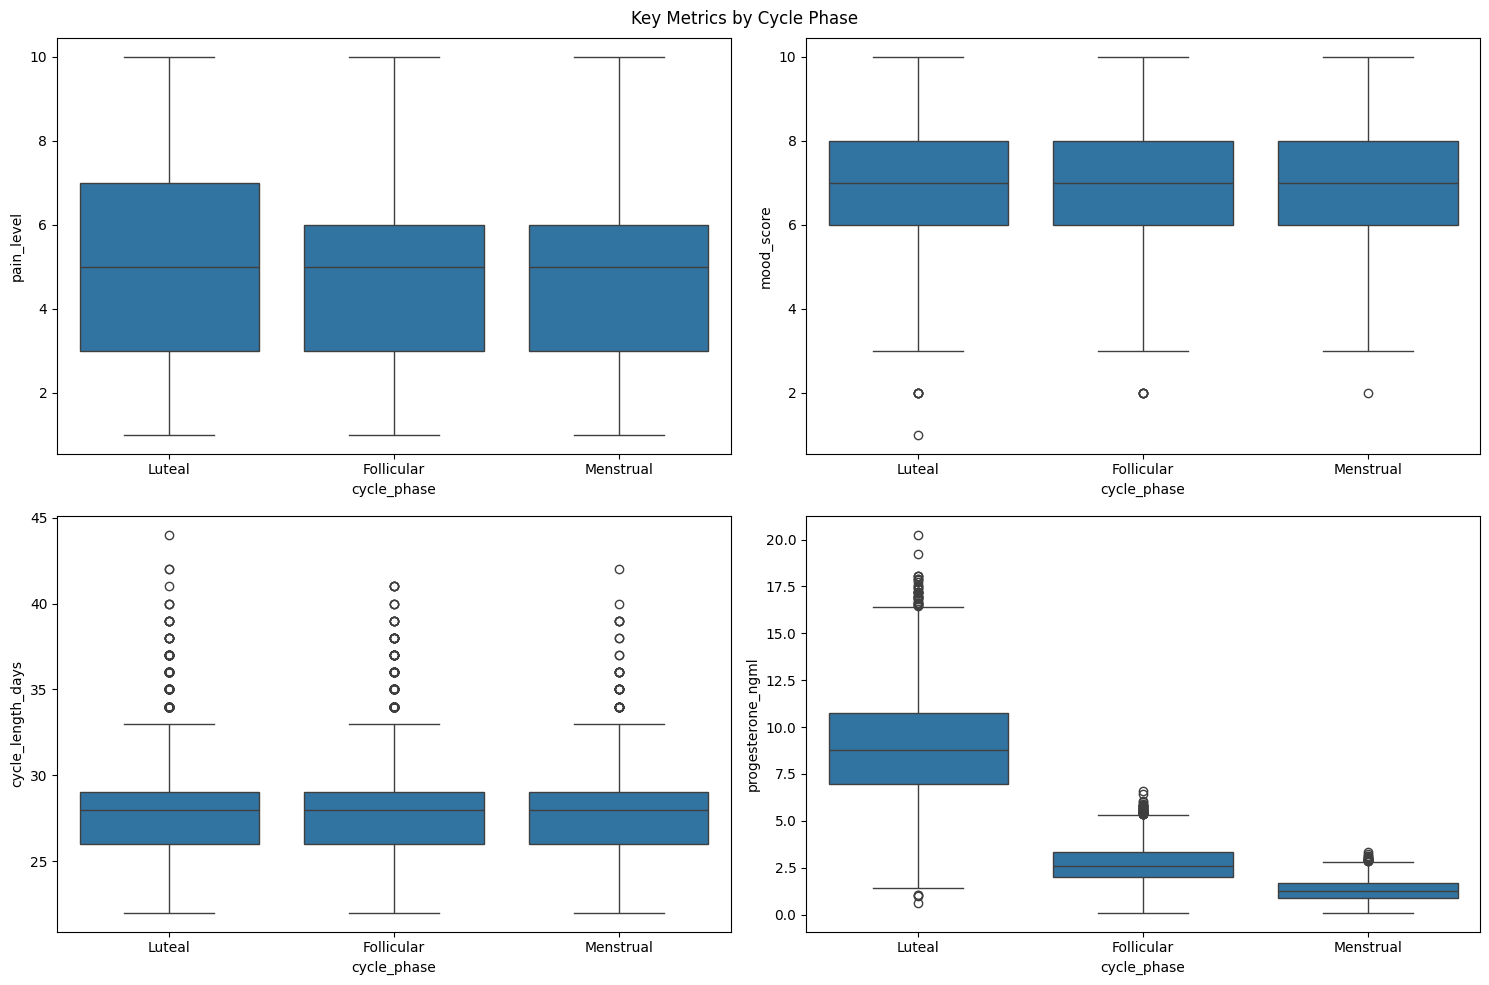

In [178]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=period_df, x='cycle_phase', y='pain_level', ax=axes[0,0])
sns.boxplot(data=period_df, x='cycle_phase', y='mood_score', ax=axes[0,1])
sns.boxplot(data=period_df, x='cycle_phase', y='cycle_length_days', ax=axes[1,0])
sns.boxplot(data=period_df, x='cycle_phase', y='progesterone_ngml', ax=axes[1,1])
plt.suptitle('Key Metrics by Cycle Phase')
plt.tight_layout()
plt.show()


#### Insights

- **Median cycle length:** ~28 days across all three phases.
- **Outliers:** Some cycles reach up to ≈40–44 days, indicating that significantly longer cycles are rare.
- **Cycle pattern:** Most cycles remain around 28 days.
- **Progesterone levels:**
  - **Luteal phase:** Much higher
  - **Follicular/Menstrual phases:** Low


### Numerical Feature Analysis

In [193]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   cycle_phase             17976 non-null  object        
 5   flow_level              17976 non-null  object        
 6   pain_level              17976 non-null  int64         
 7   pms_symptoms            17976 non-null  object        
 8   mood_score              17976 non-null  int64         
 9   stress_score_cycle      17976 non-null  float64       
 10  sleep_hours_cycle       17976 non-null  float64       
 11  energy_level            17976 non-null  int64         
 12  concentration_score     17976 non-null  int64 

In [198]:
numerical_cols = period_df.select_dtypes(include=['int64', 'float64'])
print(numerical_cols.columns)

Index(['cycle_number', 'cycle_length_days', 'pain_level', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'days_to_next_period'],
      dtype='object')


### Correlation Matrix - HeatMap

In [209]:
numerical_cols_list = period_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols_list)

Index(['cycle_number', 'cycle_length_days', 'pain_level', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'days_to_next_period'],
      dtype='object')


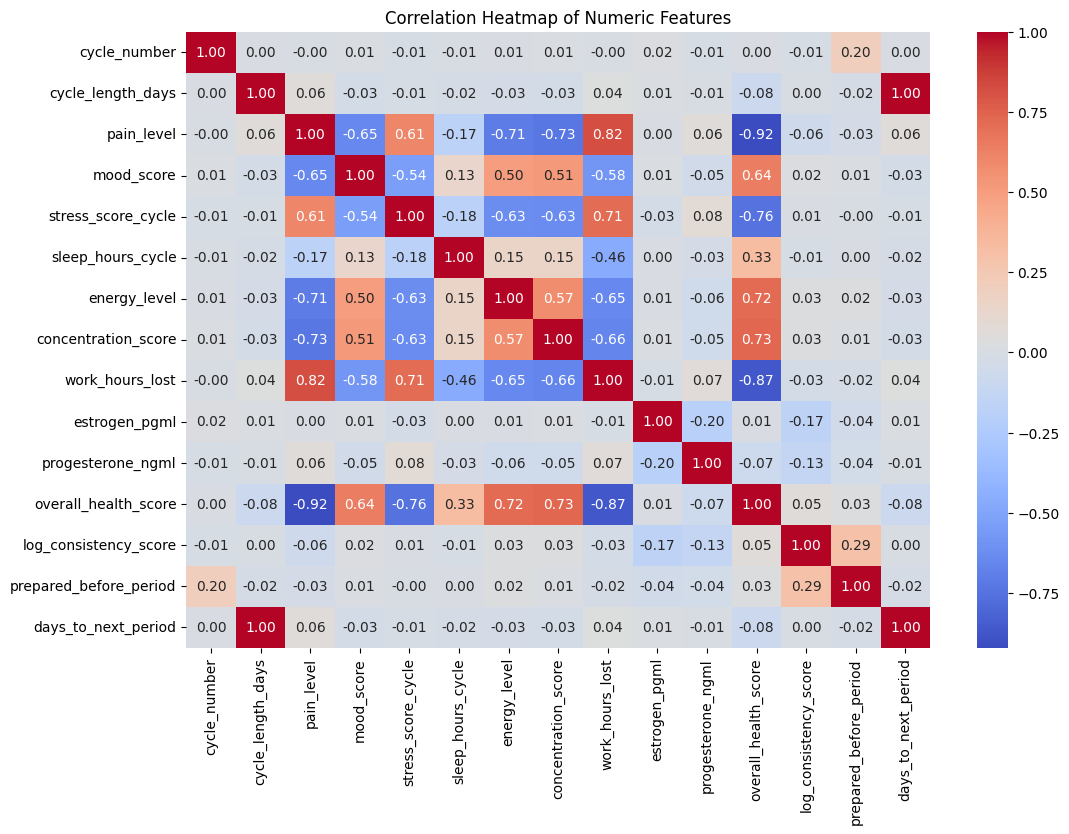

In [213]:
corr = period_df[numerical_cols_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Linear Model with Numeric Features Only

#### Choosing features and target

In [231]:
feature_cols = ['pain_level', 'mood_score', 'stress_score_cycle', 'sleep_hours_cycle', 'energy_level', 'concentration_score']

X_num = period_df[feature_cols]
y_num = period_df['days_to_next_period']

#### Train-test Split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

#### Fit linear regression model

In [233]:
model_num = LinearRegression()
model_num.fit(X_train, y_train)

LinearRegression()

In [234]:
y_pred = model_num.predict(X_test)

In [236]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Regression Metrics for Numerical Features")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Regression Metrics for Numerical Features
MAE: 1.8325548190631156
RMSE: 2.3978238933829457
R²: 0.005179322278665022


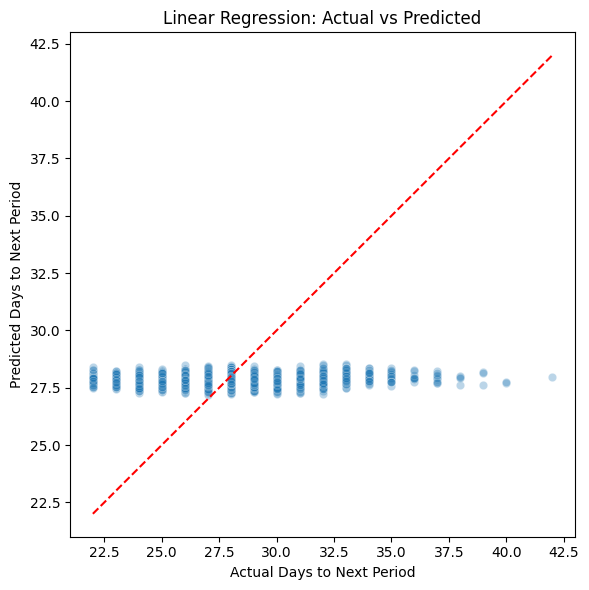

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Days to Next Period')
plt.ylabel('Predicted Days to Next Period')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()


### Linear Model with Numerical and Categorical Features

In [230]:
for col in categorical_cols.columns:
    unique_count = categorical_cols[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {categorical_cols[col].unique()}\n")

user_id: 2000 unique values
  Values: ['U00001' 'U00002' 'U00003' ... 'U01998' 'U01999' 'U02000']

cycle_phase: 3 unique values
  Values: ['Luteal' 'Follicular' 'Menstrual']

flow_level: 3 unique values
  Values: ['Heavy' 'Light' 'Moderate']

pms_symptoms: 2 unique values
  Values: ['Yes' 'No']

ovulation_result: 2 unique values
  Values: ['Positive' 'Negative']



#### Binary Mapping

In [ ]:
period_df['']

In [ ]:
### One-hot encoding the Categorical Columns

In [224]:
# merged_df = period_df.merge(user_df, on='user_id', how='left')

In [124]:
# merged_df.to_csv('E:\Data Science Projects\Menstrual Cycle Tracker\Datasets\Merged.csv')

In [125]:
# merged_df.head(20)

In [126]:
# merged_df.columns

<!-- ### Printing the unique values in all columns -->

In [127]:
# for col in merged_df.columns:
#     unique_count = merged_df[col].nunique()
#     print(f"{col}: {unique_count} unique values")
#     print(f"  Values: {merged_df[col].unique()}\n")

In [128]:
# merged_df.info()

<!-- ### Converting the "start_date" column to date time format -->

In [129]:
# merged_df['start_date'] = pd.to_datetime(merged_df['start_date'])

In [130]:
# merged_df['start_date']

#### Calculating next period date as it is our target

In [131]:
# merged_df['next_period'] = merged_df['start_date'] + pd.to_timedelta(merged_df['cycle_length_days'], unit='D')
# merged_df['next_period']

In [132]:
# merged_df.shape

### Removing unnecessary column

In [133]:
# merged_df = merged_df.drop(columns=[''])